In [1]:
# Pandas and numpy for data manipulation
import math
import pandas as pd
import numpy as np
np.random.seed(42)
from collections import OrderedDict
 
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

# Import summary

In [2]:
def get_import_summary(str_file_path, 
                    str_sep = ",", 
                    str_decimal = ".", 
                    b_doublequote = False, 
                    dict_verify_dtype = None,
                    ls_exclude_var = None,
                    na_values = None):
    
    # Read in data
    df = pd.read_csv(str_file_path, 
                     sep=str_sep, 
                     decimal=str_decimal, 
                     doublequote=b_doublequote, 
                     dtype=dict_verify_dtype,
                     na_values=na_values)
    
    # initial summary
    ls_var = []
    ls_var_type = []
    ls_dist_val = []
    ls_mean = []
    ls_std = []
    ls_min = []
    ls_25 = []
    ls_50 = []
    ls_75 = []
    ls_max = []
    ls_sample = []
    
    # selected columns
    if ls_exclude_var is None:
        ls_selected_col = [col for col in df.columns]
    else:
        ls_selected_col = [col for col in df.columns if col not in ls_exclude_var]        
    df = df[ls_selected_col]
    
    # Describe for Numerical Columns
    df_num_desc = df.describe()
    
    # Value Counts for Categorical Columns
    
    # loop through each variables
    for col in df.columns:        
        if df[col].dtype != "object":
            # get var and var type
            ls_var.append(col)
            ls_var_type.append(df[col].dtype)

            # calculate distinct value
            df_val_cnt = df[col].value_counts()
            i_dist_val = df_val_cnt.shape[0]
            ls_dist_val.append(i_dist_val)
        
            # get numerical stats
            ls_mean.append(df_num_desc.loc["mean", col])
            ls_std.append(df_num_desc.loc["std", col])
            ls_min.append(df_num_desc.loc["min", col])
            ls_25.append(df_num_desc.loc["25%", col])
            ls_50.append(df_num_desc.loc["50%", col])
            ls_75.append(df_num_desc.loc["75%", col])
            ls_max.append(df_num_desc.loc["max", col])
            
            # get sample values        
            ls_val = df_val_cnt.index.values
            i_num_sample = min([5, i_dist_val])
            str_sample = str(ls_val[0:i_num_sample])
            ls_sample.append(str_sample)
        
    df_summary = pd.DataFrame(OrderedDict((
            ("variable", pd.Series(ls_var)),
            ("variable_type", pd.Series(ls_var_type)),
            ("n_distinct_values", pd.Series(ls_dist_val)),
            ("mean", pd.Series(ls_mean)),
            ("std", pd.Series(ls_std)),
            ("min", pd.Series(ls_min)),
            ("25p", pd.Series(ls_25)),
            ("50p", pd.Series(ls_50)),
            ("75p", pd.Series(ls_75)),
            ("max", pd.Series(ls_max)),
            ("sample_values", pd.Series(ls_sample))
        ))
    )
    return df, df_summary

In [3]:
# variable params
str_target_var = "target90"
ls_exclude_var = [
    "points",
    "customernumber", 
    "date", 
    "datecreated",
    "deliverydatepromised",
    "deliverydatereal",
]

# read data params
str_file_path = "data/dmc2010_train.csv"
str_sep = ";"
str_decimal = "."
b_doublequote = True
na_values = "?"

dict_verify_dtype = {
    "salutation": np.object,
    "title": np.object,
    "newsletter": np.object,
    "model": np.object,
    "paymenttype": np.object,
    "deliverytype": np.object,
    "voucher": np.object,
    "case": np.object,
    "gift": np.object,
    "entry": np.object,
    "shippingcosts": np.object,
    "w8": np.object,
}

In [4]:
df, df_summary = get_import_summary(str_file_path, 
                                    str_sep = str_sep,
                                    str_decimal = str_decimal,
                                    b_doublequote = b_doublequote,
                                    ls_exclude_var = ls_exclude_var,
                                    dict_verify_dtype = dict_verify_dtype,
                                    na_values=na_values)

print "Number of observations:", df.shape[0]
print "Number of variables:", df.shape[1]
print "Proportion of the target variable"
print df[str_target_var].value_counts()/df.shape[0]
display(df_summary)

Number of observations: 32428
Number of variables: 32
Proportion of the target variable
0    0.813402
1    0.186598
Name: target90, dtype: float64


/Users/hongong/virtualenv/sparklibs/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,variable,variable_type,n_distinct_values,mean,std,min,25p,50p,75p,max,sample_values
0,domain,int64,13,7.517115,3.683945,0.0,4.0,9.0,11.0,12.0,[12 9 4 8 11]
1,invoicepostcode,int64,97,48.752282,24.361425,0.0,30.0,47.0,66.0,99.0,[44 50 45 52 41]
2,numberitems,int64,27,2.019551,1.726046,1.0,1.0,1.0,2.0,50.0,[1 2 3 4 5]
3,weight,int64,2903,637.920809,724.358131,0.0,3.0,494.0,920.0,20076.0,[0 1 2 3 4]
4,remi,int64,14,0.059979,0.388740,0.0,0.0,0.0,0.0,19.0,[0 1 2 3 4]
5,cancel,int64,10,0.061613,0.306833,0.0,0.0,0.0,0.0,17.0,[0 1 2 3 4]
6,used,int64,17,0.068860,0.474444,0.0,0.0,0.0,0.0,19.0,[0 1 2 3 4]
7,w0,int64,36,0.902122,1.654767,0.0,0.0,1.0,1.0,99.0,[0 1 2 3 4]
8,w1,int64,34,0.404342,1.410395,0.0,0.0,0.0,0.0,84.0,[0 1 2 3 4]
9,w2,int64,34,0.276644,1.353981,0.0,0.0,0.0,0.0,90.0,[0 1 2 3 4]


# Visualization of numerical data

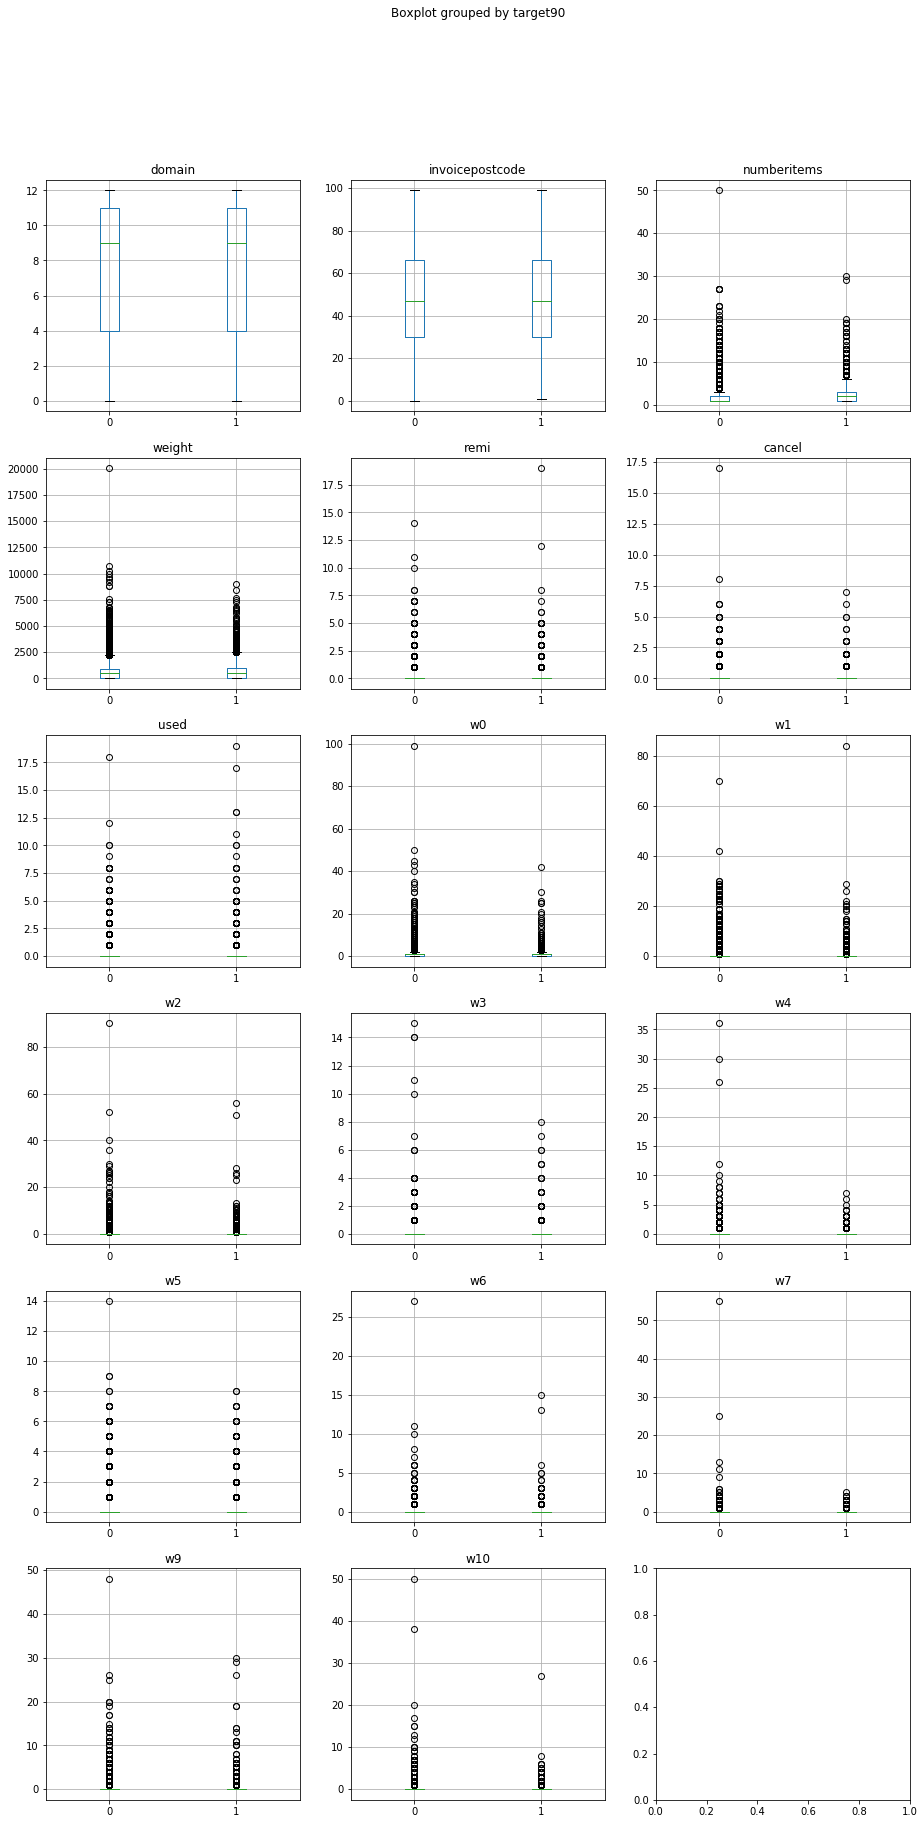

In [5]:
ls_num_data = [col for col in df.columns if df[col].dtype != "object" and col != str_target_var]
ncols = 3
nrows = int(math.ceil(len(ls_num_data) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Visualization of numerical data
for idx, var in enumerate(ls_num_data):
    i = idx / ncols
    j = idx % ncols
    axes[i, j].get_xaxis().get_label().set_visible(False)
    df.boxplot(column=var, by=str_target_var, ax=axes[i, j])

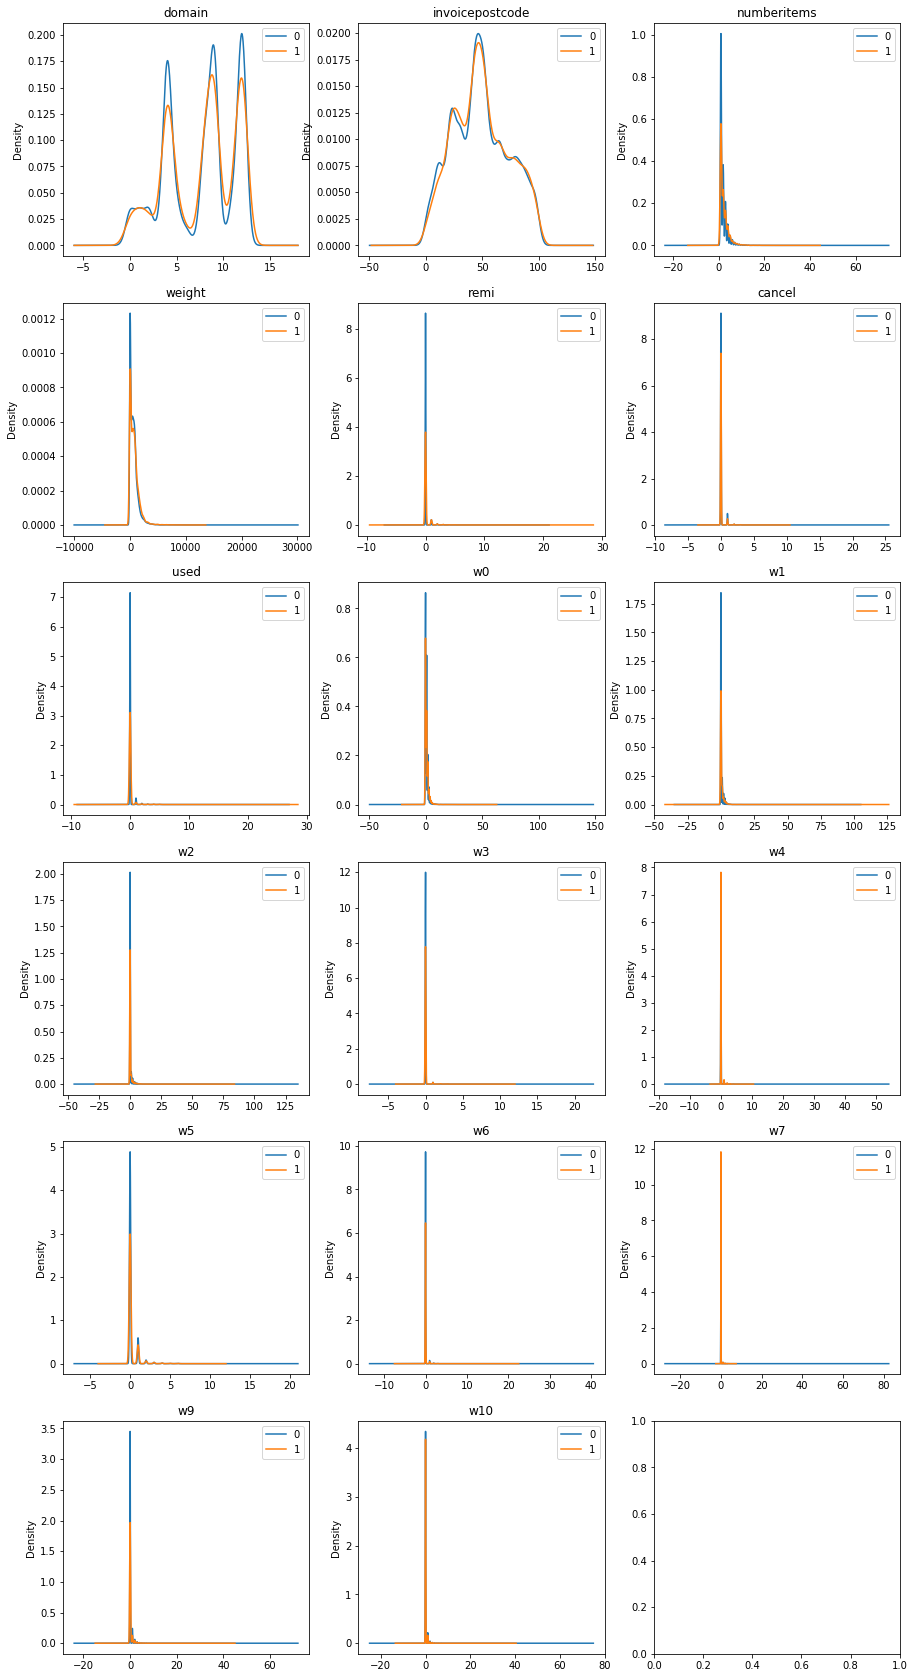

In [6]:
def plot_dens_data(df, col, str_target_var, ls_val_target, ax):
    dict_density = {}
    for target in ls_val_target:
        s_values = df[df[str_target_var] == target][col]
        dict_density[target] = s_values

    try:
        df_density = pd.DataFrame(dict_density)
        df_density.plot.kde(ax=ax, title=col)
    except:
        print "Cannot plot", col


# Visualization of numerical data
ls_num_data = [col for col in df.columns if df[col].dtype != "object" and col != str_target_var]
ncols = 3
nrows = int(math.ceil(len(ls_num_data) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

ls_val_target = df[[str_target_var]].drop_duplicates()[str_target_var].tolist()
for idx, var in enumerate(ls_num_data):
    i = idx / ncols
    j = idx % ncols
    plot_dens_data(df, var, str_target_var, ls_val_target, ax=axes[i, j])

# Visualization of categorical data

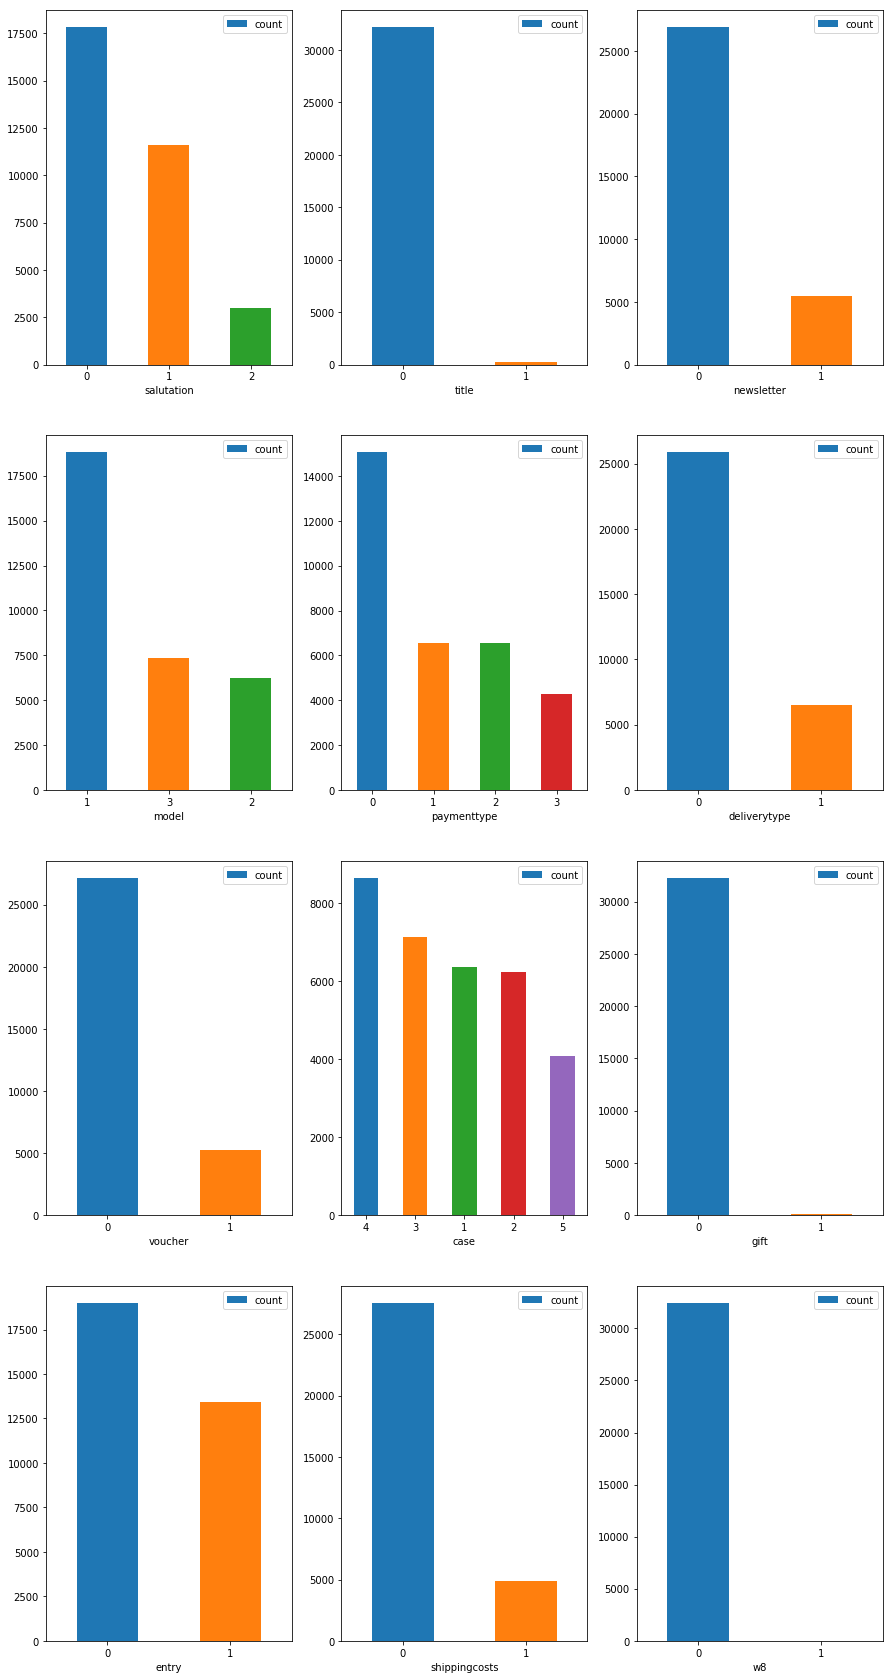

In [7]:
def plot_cat_data(df, col, ax):
    s_count = df[col].value_counts()
    x = s_count.index.tolist()
    y = s_count.values
    df_bar = pd.DataFrame({col: x, "count": y}, columns=[col, "count"])
    df_bar.plot.bar(x=col, y="count", rot=0, ax=ax)

ls_cat_data = [col for col in df.columns if df[col].dtype == "object" \
               and col != str_target_var \
               and len(df[col].value_counts().index.values) < 20]    
ncols = 3
nrows = int(math.ceil(len(ls_cat_data) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Visualization of categorical data
# TODO: handle if only 1 cat data
for idx, var in enumerate(ls_cat_data):
    i = idx / ncols
    j = idx % ncols
    plot_cat_data(df, var, axes[i, j])

# Missing values

In [8]:
ls_var = []
ls_num_null = []
ls_pct_null = []
thres_pct = 10.0

for var in df.columns:
    df_isnull = df[df[var].isnull()]

    i_num_null = df_isnull.shape[0]
    i_num_obs = df.shape[0]
    f_pct_null = i_num_null * 100.0 / i_num_obs

    if f_pct_null > thres_pct:
        ls_var.append(var)
        ls_num_null.append(i_num_null)
        ls_pct_null.append(f_pct_null)

df_missing = pd.DataFrame(OrderedDict((
    ("variable", ls_var),
    ("Number of missing values", ls_num_null),
    ("% of missing values", ls_pct_null)
))).sort_values(["% of missing values"], ascending=False)
df_missing

,variable,Number of missing values,% of missing values
0,delivpostcode,31036,95.707413
1,advertisingdatacode,25905,79.884668


# Variable importance

Feature ranking:
1. feature 15 remi (0.157352)
2. feature 13 shippingcosts (0.127352)
3. feature 3 newsletter (0.125604)
4. feature 6 deliverytype (0.087096)
5. feature 14 weight (0.080224)
6. feature 19 w1 (0.050836)
7. feature 10 numberitems (0.049026)
8. feature 9 case (0.038287)
9. feature 7 invoicepostcode (0.037283)
10. feature 4 model (0.035429)
11. feature 17 used (0.026904)
12. feature 18 w0 (0.023542)
13. feature 2 domain (0.022865)
14. feature 5 paymenttype (0.022343)
15. feature 23 w5 (0.019771)
16. feature 8 voucher (0.019163)
17. feature 12 entry (0.016265)
18. feature 20 w2 (0.011837)
19. feature 0 salutation (0.010467)
20. feature 27 w9 (0.009447)
21. feature 16 cancel (0.009058)
22. feature 24 w6 (0.006878)
23. feature 28 w10 (0.005042)
24. feature 21 w3 (0.002945)
25. feature 22 w4 (0.002699)
26. feature 25 w7 (0.001292)
27. feature 1 title (0.000928)
28. feature 11 gift (0.000064)
29. feature 26 w8 (0.000000)


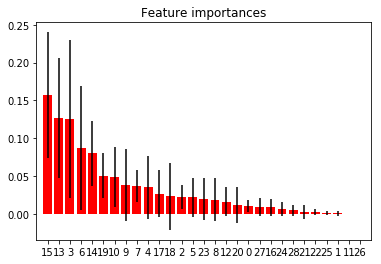

In [9]:
from sklearn.ensemble import RandomForestClassifier

ls_sel_feat = [cname for cname in df.columns if cname not in ["target90", "delivpostcode", "advertisingdatacode"]]
df_notnull = df[df[var].notnull()]
X = df_notnull[ls_sel_feat].loc[:, "salutation": "w10"].as_matrix()
y = df_notnull["target90"].tolist()

clf = RandomForestClassifier(max_depth=5, random_state=0)
clf.fit(X, y)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], ls_sel_feat[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Extreme values

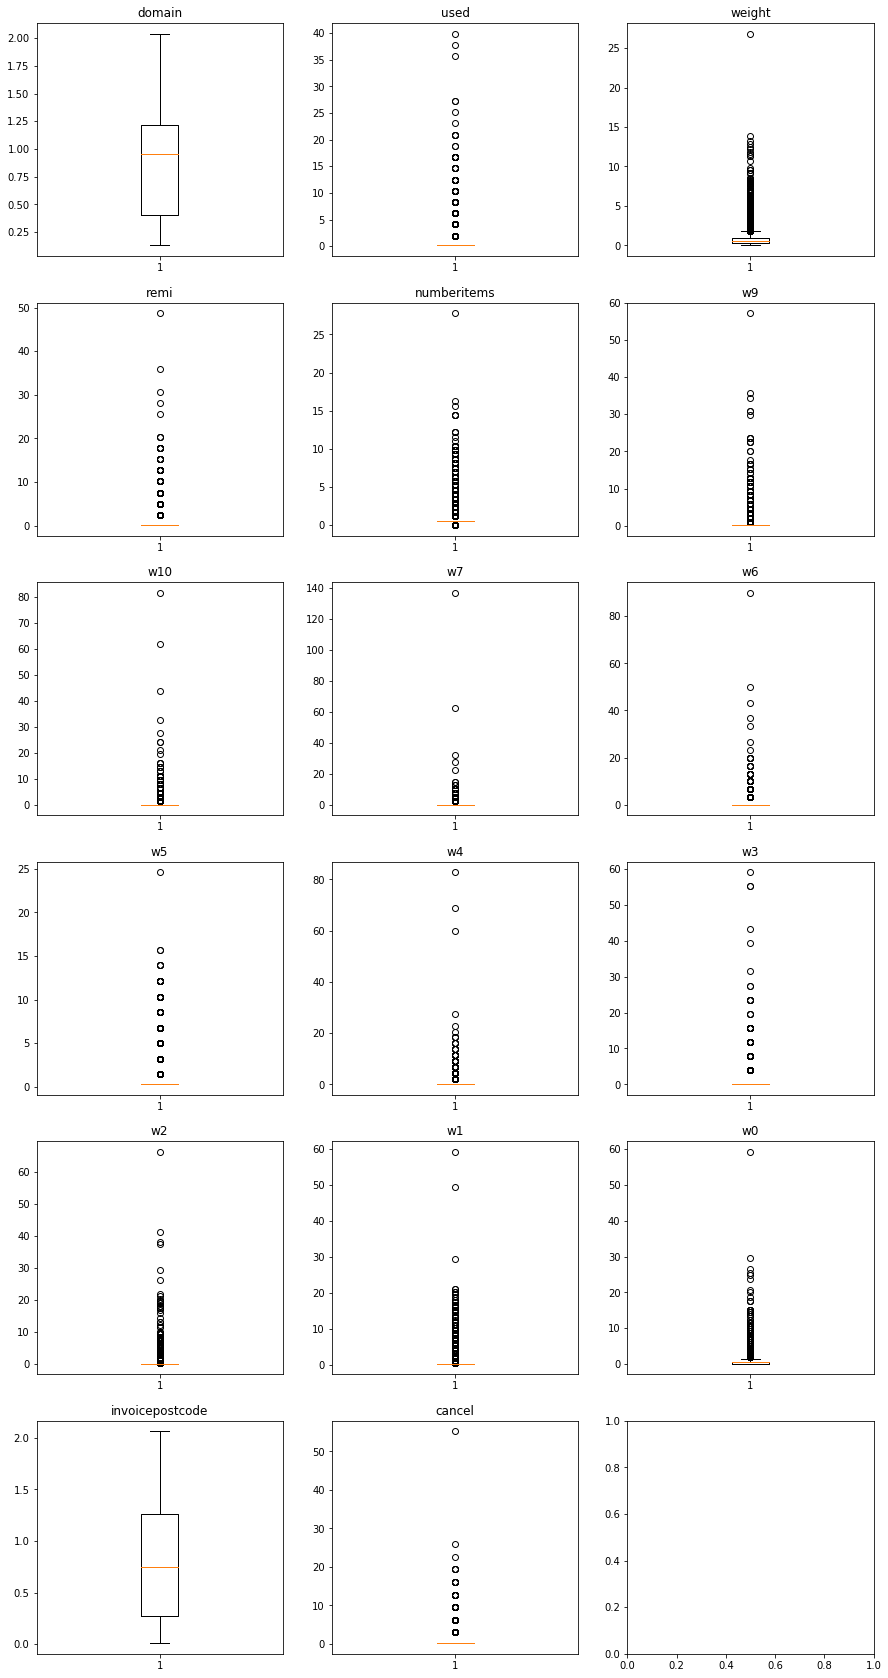

In [10]:
ls_check_var = list(set(ls_num_data) & set(ls_sel_feat))
ncols = 3
nrows = int(math.ceil(len(ls_check_var) * 1.0 / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 30))

# Decision rule with mean and standard deviation
for idx, var in enumerate(ls_check_var):
    i = idx / ncols
    j = idx % ncols
    mu = df_notnull[var].mean()
    std = df_notnull[var].std()
    res = np.abs(df_notnull[var] - mu) / std
    axes[i, j].boxplot(res)
    axes[i, j].set_title(var)